# Compute density from catalog and generate density split catalogs

In [1]:
import math
import numpy as np
import scipy
from matplotlib import pyplot as plt
import matplotlib as mpl

plt.rcParams["figure.figsize"] = (10, 8)
plt.rcParams.update({'font.size': 14})

from abacusnbody.data.compaso_halo_catalog import CompaSOHaloCatalog
from cosmoprimo import *
from pypower import CatalogMesh, MeshFFTPower, CatalogFFTPower, PowerSpectrumStatistics, utils, setup_logging
from pycorr import TwoPointCorrelationFunction, TwoPointEstimator, NaturalTwoPointEstimator, project_to_multipoles, BoxSubsampler, project_to_wp, utils, setup_logging

from densitysplit import catalog_data, density_split

## Data and output directories

In [2]:
data_dir = '/feynman/work/dphp/mp270220/data/'
output_dir = '/feynman/work/dphp/mp270220/outputs/'

## Get data

In [3]:
## Abacus

#catalog_name = 'AbacusSummit_1Gpc_z1.175'
catalog_name = 'AbacusSummit_2Gpc_z1.175'
#catalog_name = 'AbacusSummit_2Gpc_z0.800'
#catalog_name = 'mock'

abacus_catalog = catalog_data.Data.load(data_dir+catalog_name+'.npy')
abacus_catalog.shift_boxcenter(-abacus_catalog.offset)

In [4]:
## Log-normal mocks
lognormal_mock = catalog_data.Data.load(output_dir+'mocks_rsd/AbacusSummit_1Gpc_z1.175_mock0.npy')
lognormal_mock.shift_boxcenter(-lognormal_mock.offset)

## Apply RSD

In [5]:
# Abacus summit base cosmology
cosmo_abacus = fiducial.AbacusSummitBase()
bg = cosmo_abacus.get_background()
hz = 100*bg.efunc(abacus_catalog.redshift)

abacus_catalog.set_rsd(hz=hz)

## Compute density

In [9]:
cellsize = 10
resampler = 'tsc'

# Compute density without weights
abacus_catalog_density = density_split.DensitySplit(abacus_catalog)
abacus_catalog_density.compute_density(cellsize=cellsize, resampler=resampler, use_rsd=False, use_weights=False)

# Compute density without weights
lognormal_mock_density = density_split.DensitySplit(lognormal_mock)
lognormal_mock_density.compute_density(cellsize=cellsize, resampler=resampler, use_rsd=False, use_weights=False)

### Plot density distribution

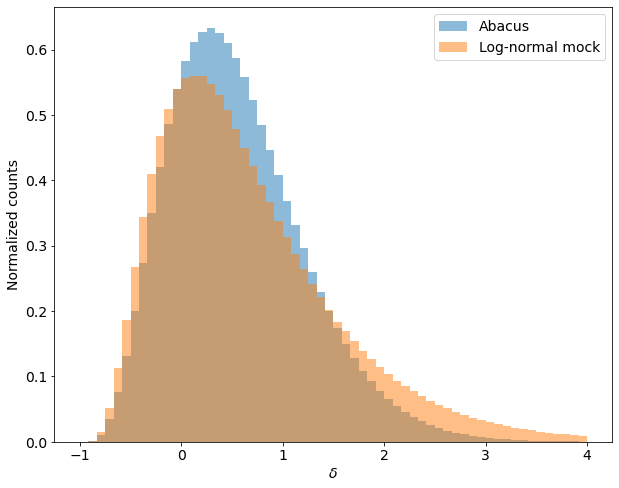

In [11]:
plt.hist(abacus_catalog_density.data_densities, range=(-1, 4), bins=60, density=True, alpha=0.5, label='Abacus')
plt.hist(lognormal_mock_density.data_densities, range=(-1, 4), bins=60, density=True, alpha=0.5, label='Log-normal mock')
plt.xlabel("$\delta$")
plt.ylabel("Normalized counts")
plt.legend()
plt.show()